In [180]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tqdm.notebook import tqdm

In [5]:
!ls ../MovieLens\ dataset  

README.txt        genome-tags.csv   movies.csv        tags.csv
genome-scores.csv links.csv         ratings.csv


In [99]:
DATA_FOLDER = "../MovieLens dataset/"
df_genome_scores = pd.read_csv(DATA_FOLDER + "genome-scores.csv")
df_genome_tags = pd.read_csv(DATA_FOLDER + "genome-tags.csv")
df_links = pd.read_csv(DATA_FOLDER + "links.csv")
df_movies = pd.read_csv(DATA_FOLDER + "movies.csv")
df_ratings = pd.read_csv(DATA_FOLDER + "ratings.csv")
df_tags = pd.read_csv(DATA_FOLDER + "tags.csv")

In [208]:
df_genome_scores

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300
...,...,...,...
18472123,288167,1124,0.09875
18472124,288167,1125,0.02950
18472125,288167,1126,0.02275
18472126,288167,1127,0.11225


In [89]:
print("{0:<50}{1}".format('Total number of movies:', len(df_movies["movieId"].unique())))
print("{0:<50}{1}".format('Number of movies rated by at least one user:', len(df_ratings["movieId"].unique())))
print("{0:<50}{1}".format('Number of movies with user tags:', len(df_tags["movieId"].unique())))
print("{0:<50}{1}".format('Number of movies with genome score:', len(df_genome_scores["movieId"].unique())))

Total number of movies:                           86537
Number of movies rated by at least one user:      83239
Number of movies with user tags:                  53452
Number of movies with genome score:               16376


### general frequncy

/var/folders/b2/yfqb1mj945ncbc82gjz4yr7h0000gn/T/ipykernel_21684/3060786076.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


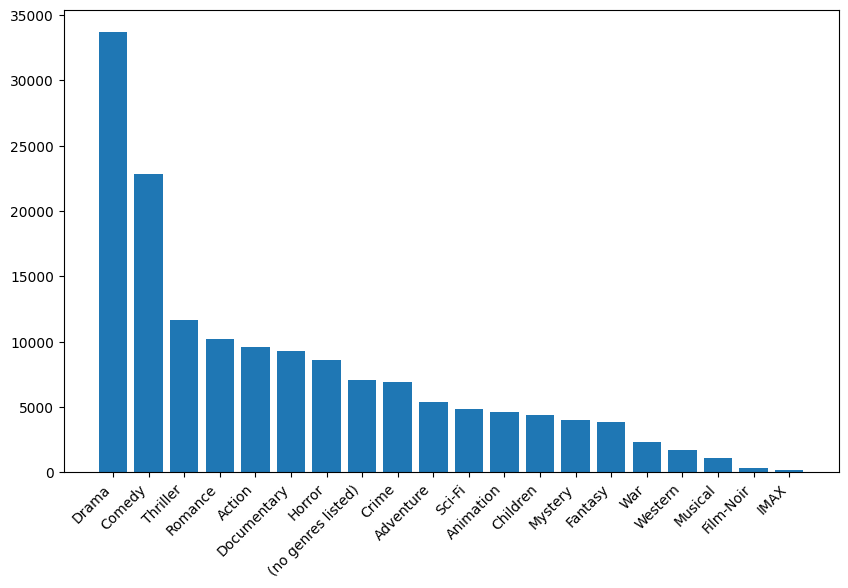

In [142]:
genre_frequency = df_movies[unique_genres].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genre_frequency.keys(), genre_frequency.values)

plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

None

### user raitings for each genre

In [174]:

genre_rating_distribution = dict()
for genre in tqdm(unique_genres):
    movie_ids = df_movies.loc[df_movies[genre] == 1, "movieId"]
    genre_rating_distribution[genre] = df_ratings.loc[df_ratings.movieId.isin(movie_ids), "rating"].values

  0%|          | 0/20 [00:00<?, ?it/s]

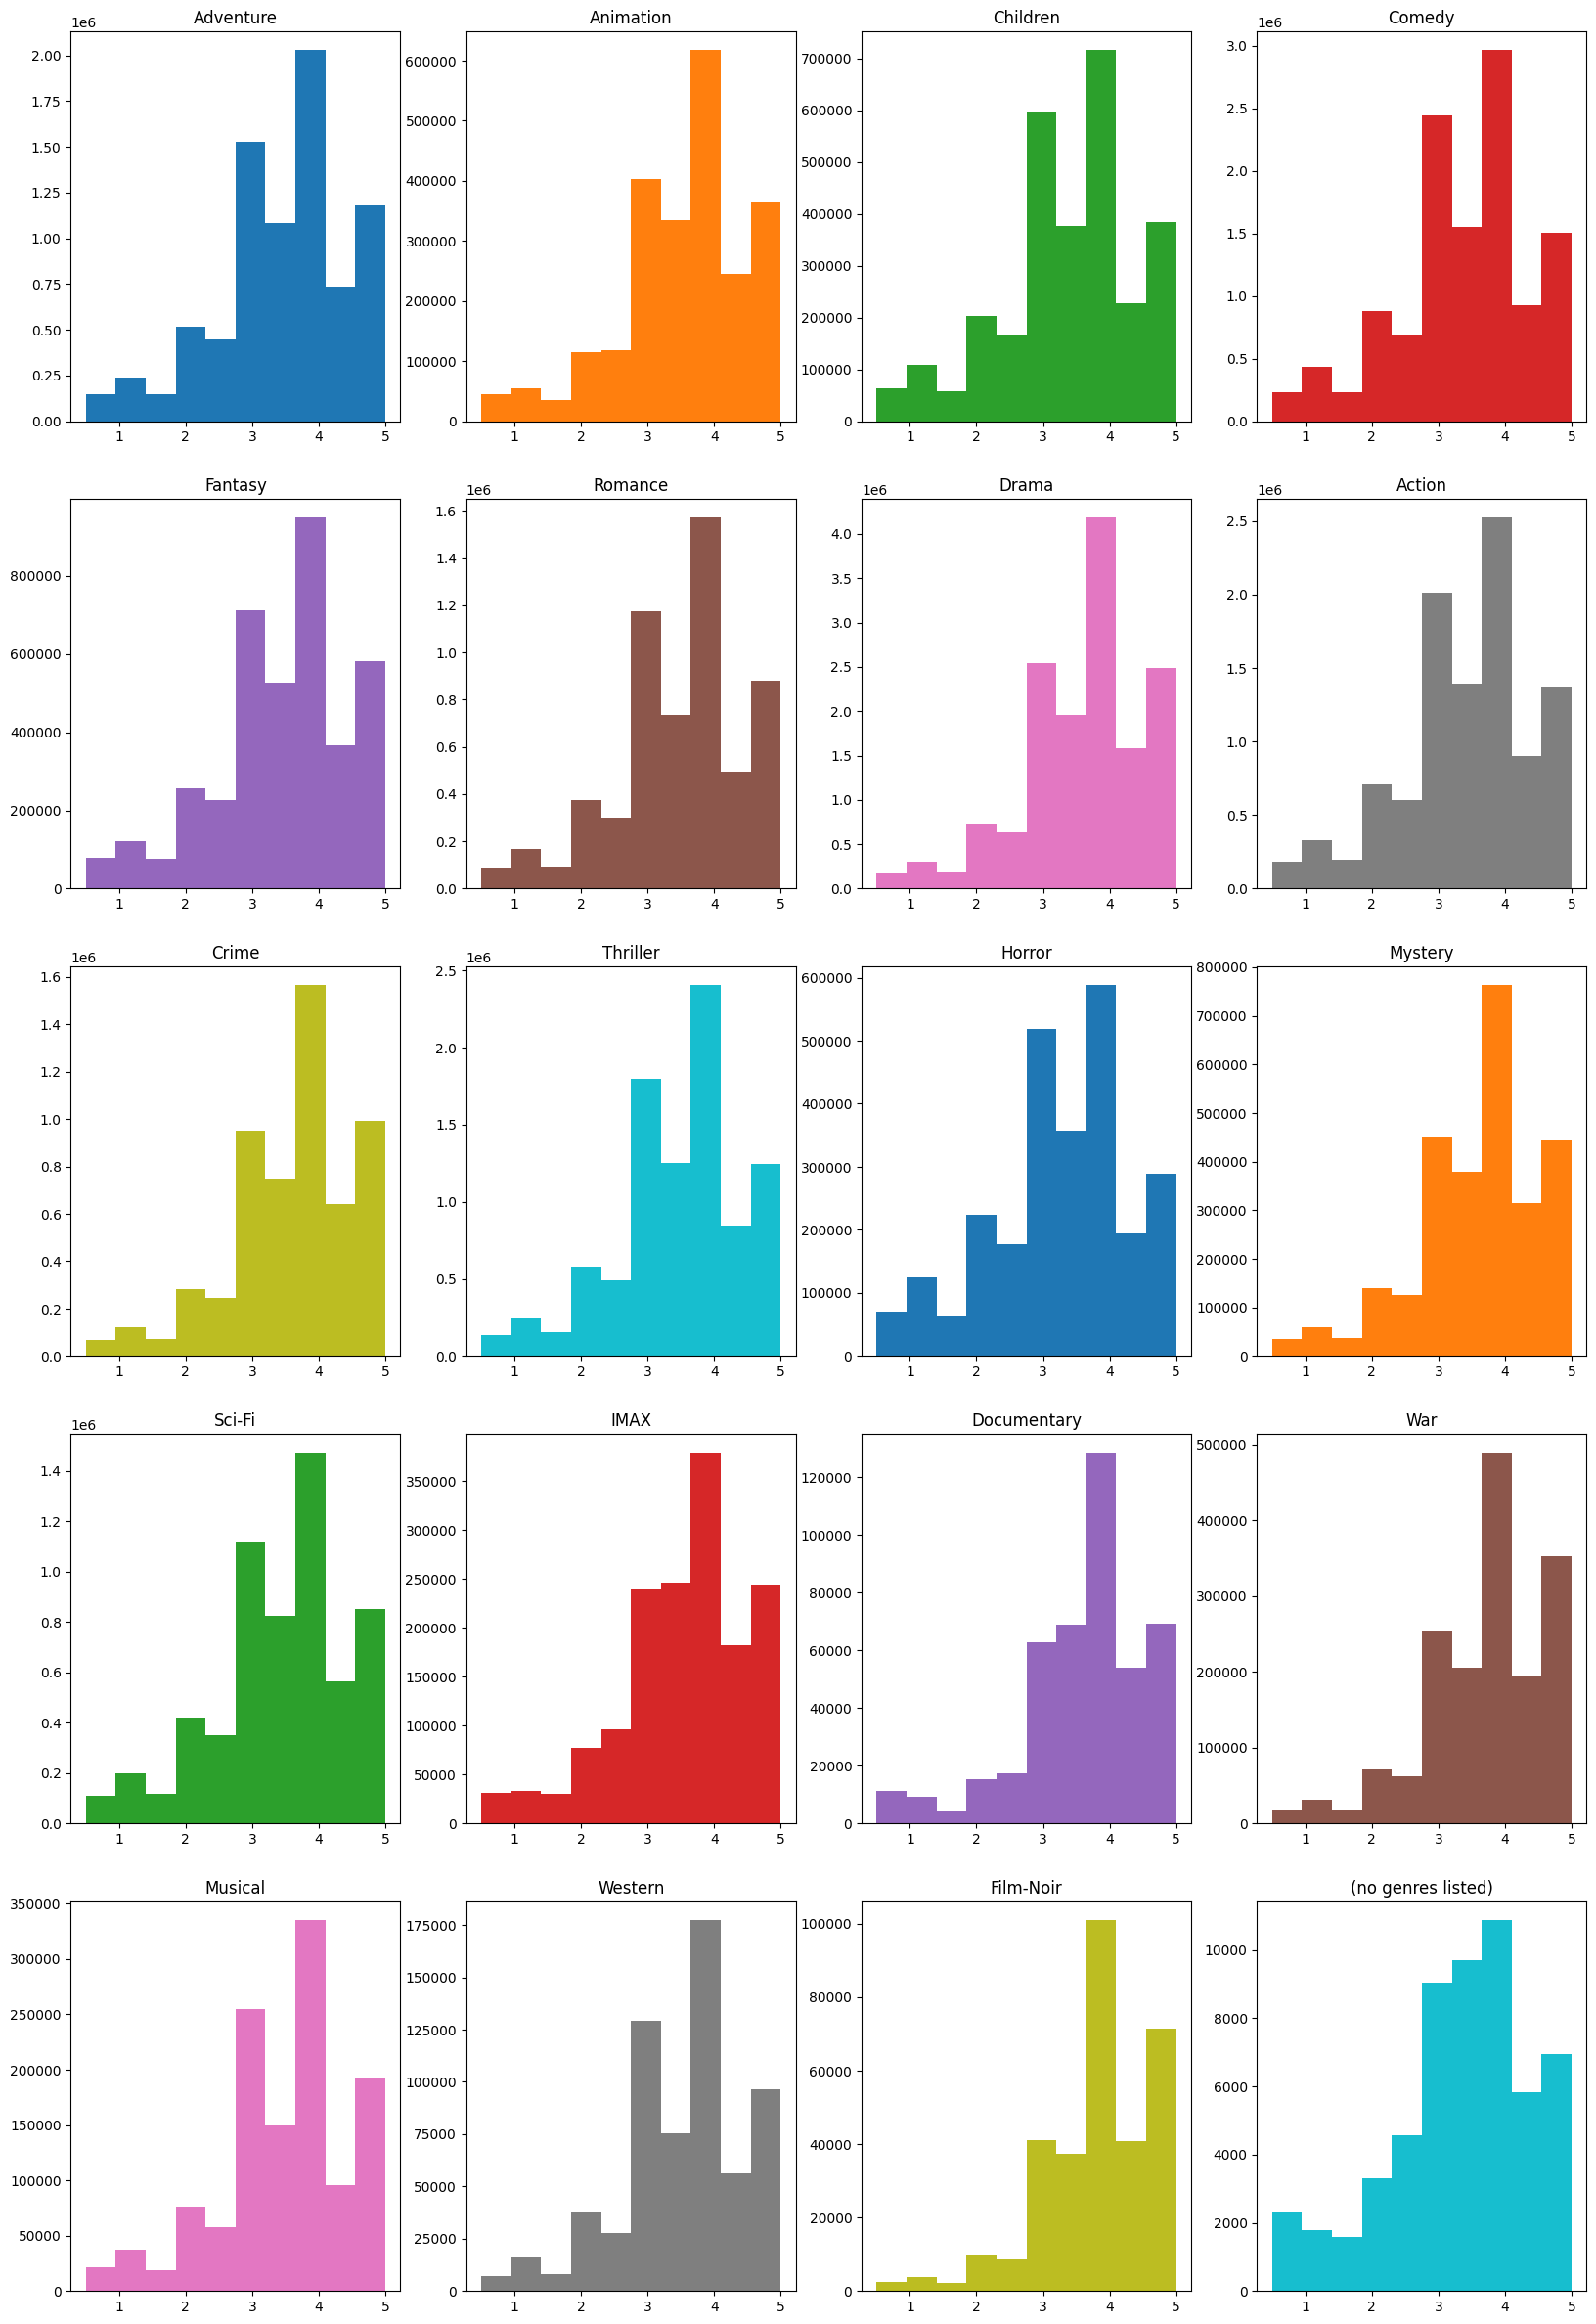

In [202]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))

colors = list(mcolors.TABLEAU_COLORS.values())
for i, genre in enumerate(unique_genres):
    ax[i // 4][i % 4].hist(genre_rating_distribution[genre], bins=10, color=colors[i % len(colors)])
    ax[i // 4][i % 4].set_title(genre)

### Genome tag distribution for each genre

In [249]:
df_genome_tags.query("tagId == 686")

,tagId,tag
685,686,musical


In [225]:
genre_genome_tag_distribution = dict()
for genre in tqdm(unique_genres):
    movie_ids = df_movies.loc[df_movies[genre] == 1, "movieId"]
    genre_genome_tag_distribution[genre] = (df_genome_scores
                                            .loc[df_genome_scores.movieId.isin(movie_ids),['tagId', "relevance"]]
                                            .groupby("tagId", as_index=False).mean()
                                            .sort_values(by="relevance", ascending=False)
                                            .iloc[:10].to_numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

/var/folders/b2/yfqb1mj945ncbc82gjz4yr7h0000gn/T/ipykernel_21684/557679522.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // 4][i % 4].set_xticklabels(ax[i // 4][i % 4].get_xticklabels(), rotation=45, ha='right')


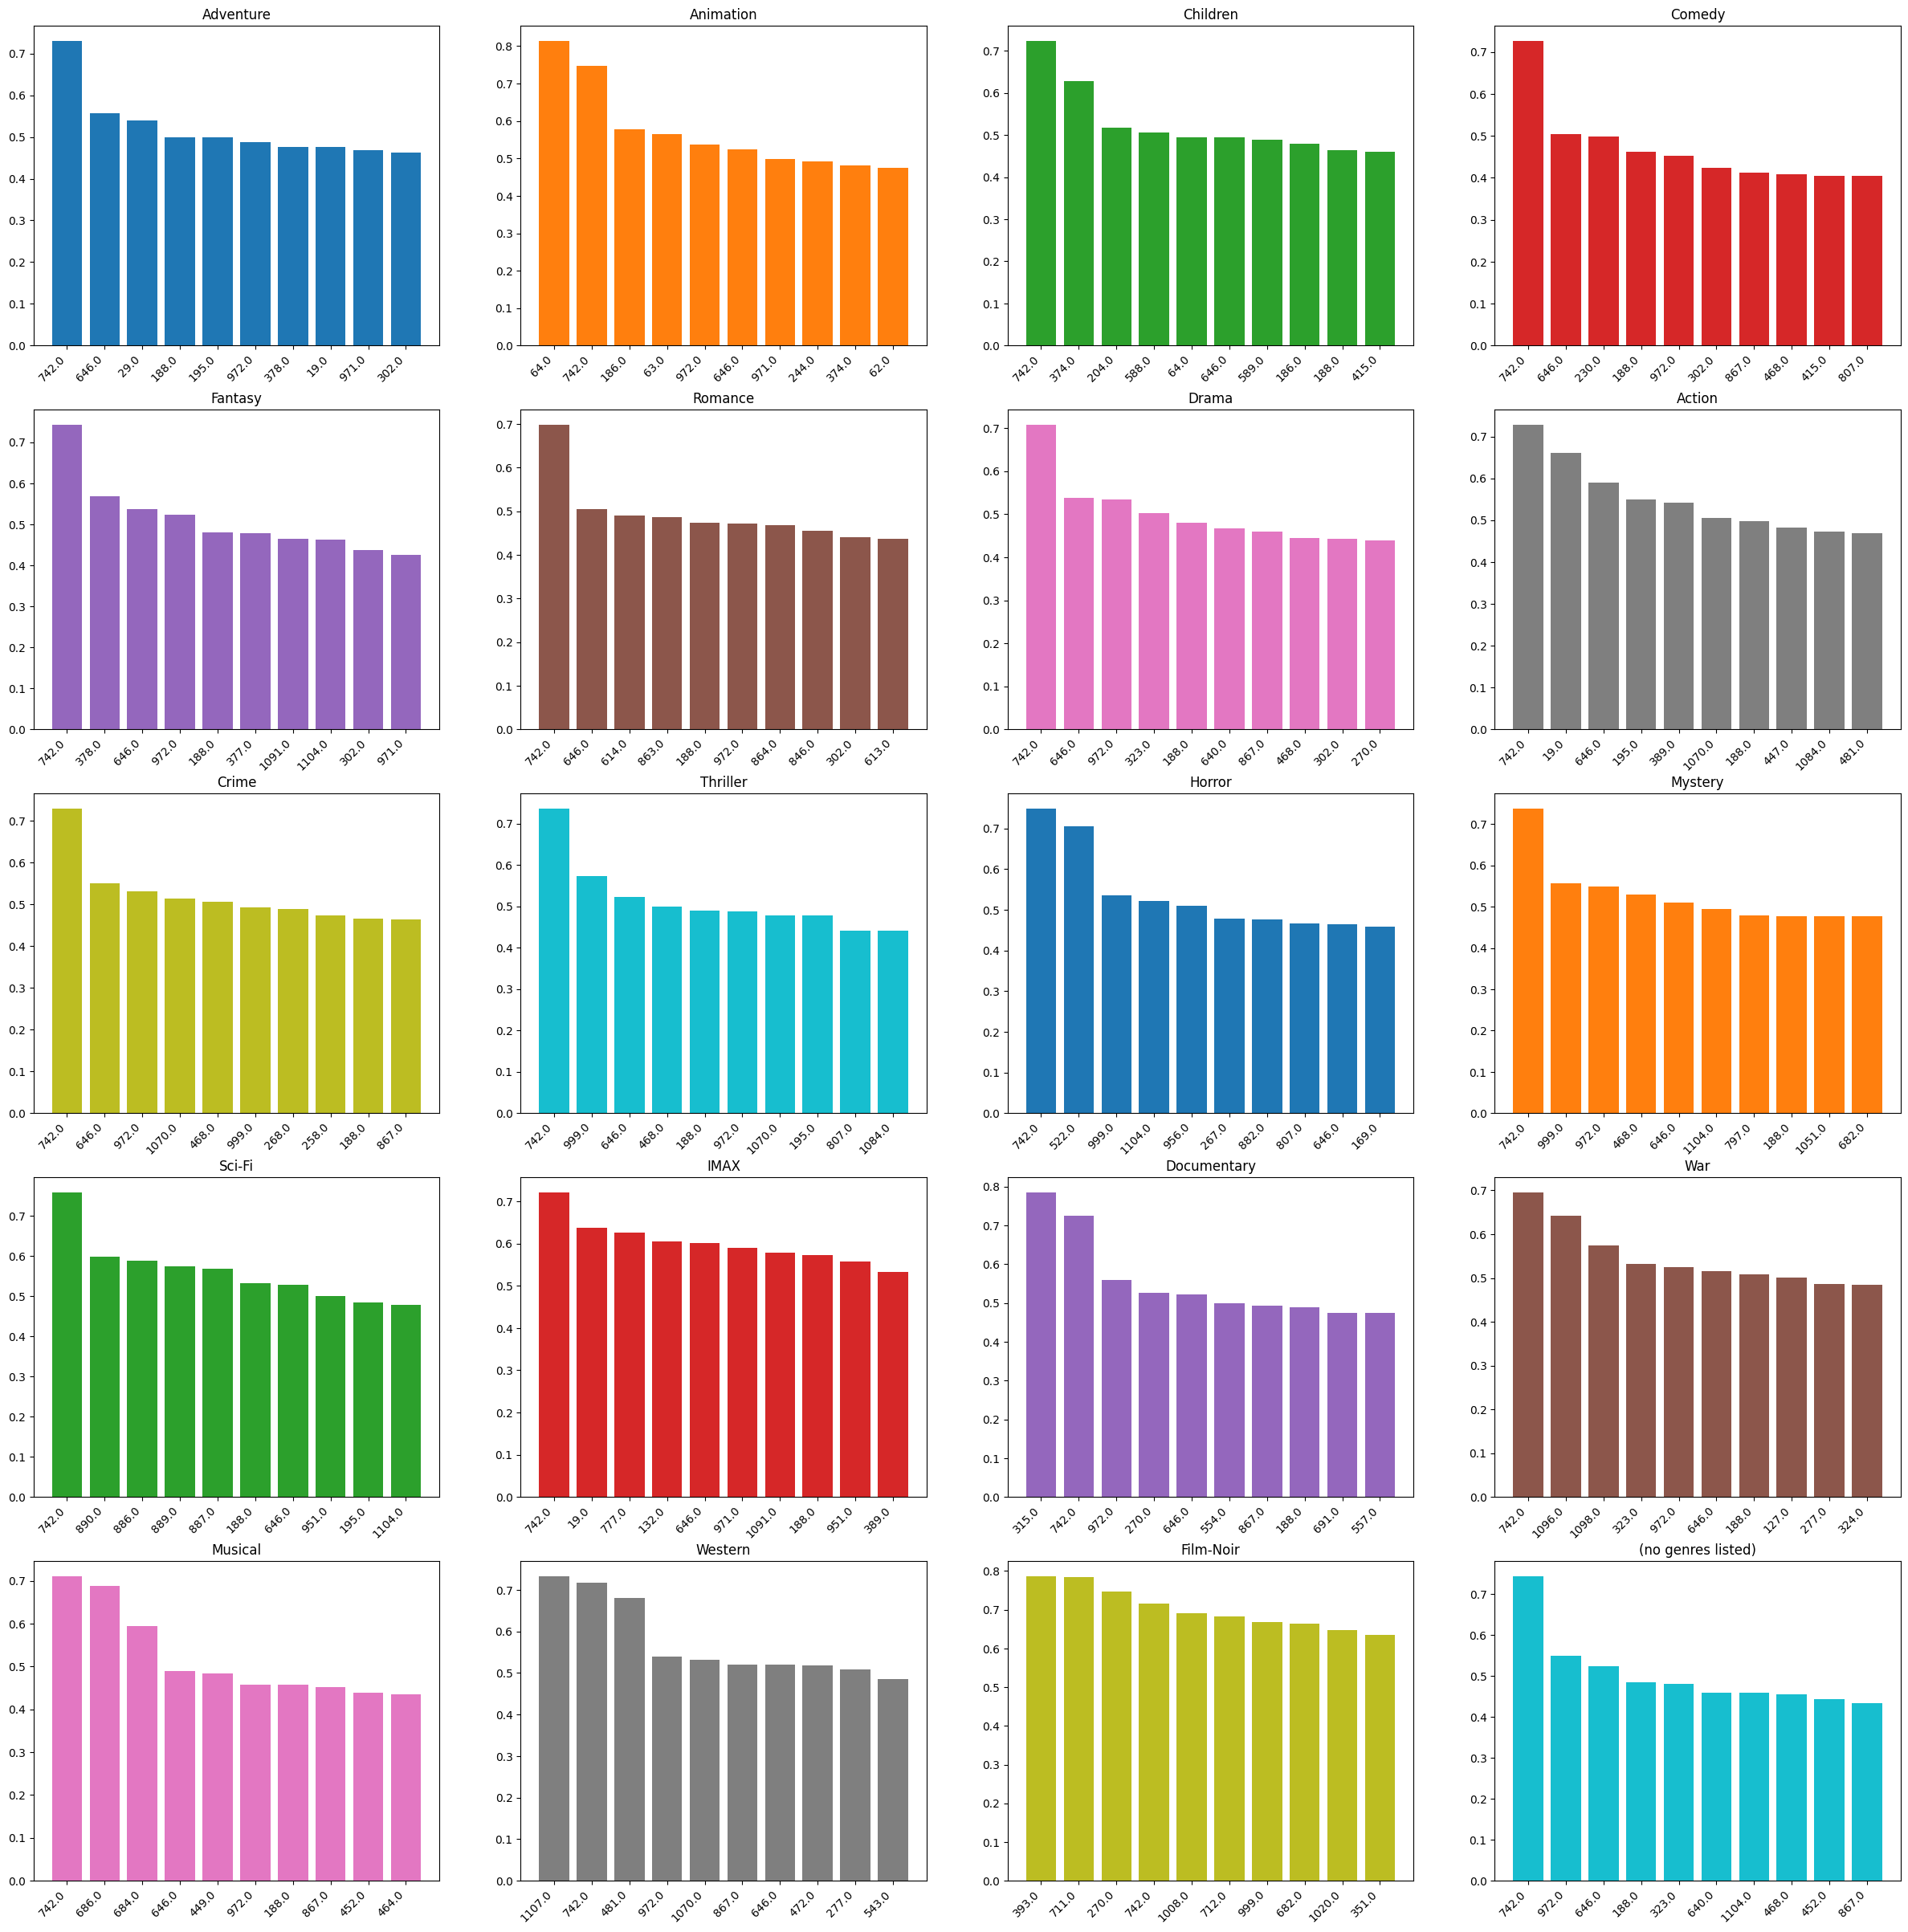

In [240]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))

colors = list(mcolors.TABLEAU_COLORS.values())
plt.xticks(rotation=45, ha='right')
for i, genre in enumerate(unique_genres):
    ax[i // 4][i % 4].bar(genre_genome_tag_distribution[genre][:, 0].astype(str),
                          genre_genome_tag_distribution[genre][:, 1],
                          color=colors[i % len(colors)])
    ax[i // 4][i % 4].set_title(genre)
    
    plt.draw()
    ax[i // 4][i % 4].set_xticklabels(ax[i // 4][i % 4].get_xticklabels(), rotation=45, ha='right')
    